<a href="https://colab.research.google.com/github/oscaraponteu11/CalculaFUA2/blob/main/Taller_Problemas_de_Regresi%C3%B3n_y_Clasificaci%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller - Problemas de Regresión y Clasificación**.


#Punto 1: Regresión
Un estudio hecho en la Universidad de los Andes indica que el promedio general final de un
estudiante de pregrado está determinado por los resultados de las notas finales de cuatro
materias.
Usando el dataset notas_andes.csv entrene un modelo de regresión que le permita realizar
la predicción del promedio general “Promedio Final PGA” a partir de las notas finales de
Fìsica 1, Fìsica 2, Cálculo Diferencial y Algebra lineal. Utilice al menos dos modelos
diferentes y reporte las métricas obtenidas con la mejor configuración de meta-parametros
posible

In [169]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [170]:
data = pd.read_csv('/content/drive/MyDrive/Bases de Datos /notas_andes.csv')
data.head()

,Nota_Final_Fisica1,Nota_Final_Fisica2,Nota_Final_AlgebraL,Nota_Final_CalculoD,Promedio_Final
0,4.60,4.80,3.80,4.2,4.23
1,3.00,3.70,4.40,4.0,3.70
2,4.05,3.98,4.00,4.0,4.04
3,5.00,5.00,4.42,5.0,4.69
4,3.60,4.00,3.64,3.3,4.30


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nota_Final_Fisica1   69 non-null     float64
 1   Nota_Final_Fisica2   69 non-null     float64
 2   Nota_Final_AlgebraL  69 non-null     float64
 3   Nota_Final_CalculoD  69 non-null     float64
 4   Promedio_Final       69 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


In [172]:
data.describe()

,Nota_Final_Fisica1,Nota_Final_Fisica2,Nota_Final_AlgebraL,Nota_Final_CalculoD,Promedio_Final
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,3.769855,3.763623,3.878116,3.969855,3.980290
std,0.510926,0.502251,0.579354,0.547471,0.316771
min,3.000000,3.000000,3.000000,3.000000,3.250000
25%,3.400000,3.500000,3.500000,3.500000,3.780000
50%,3.700000,3.700000,4.000000,4.000000,4.000000
75%,4.100000,4.000000,4.300000,4.400000,4.230000
max,5.000000,5.000000,5.000000,5.000000,4.810000


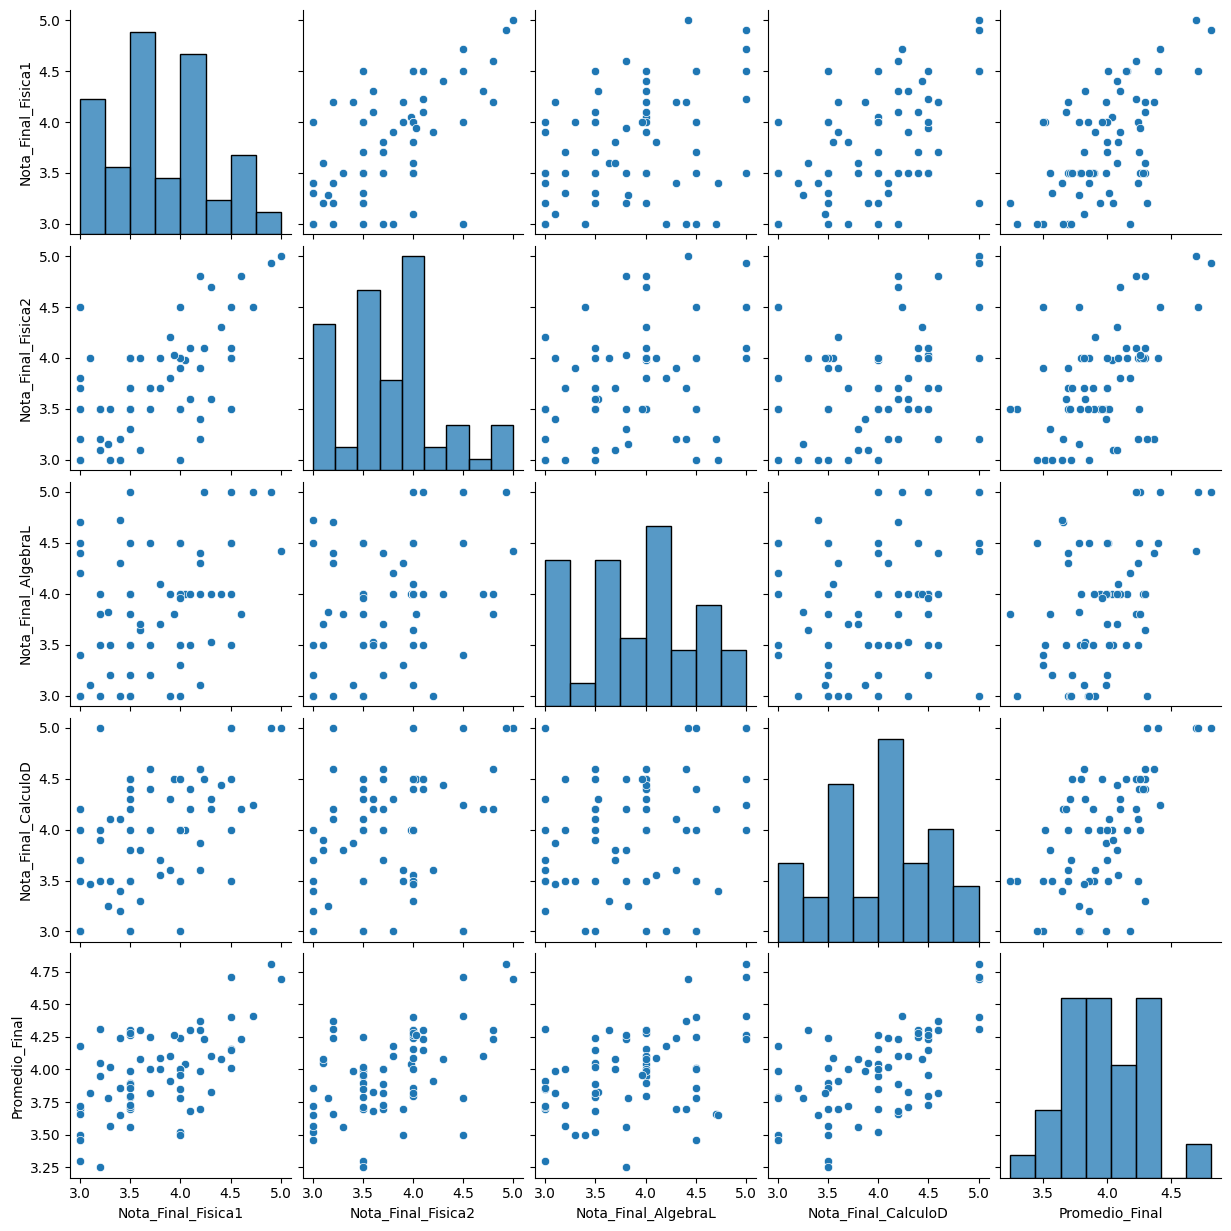

In [173]:
sns.pairplot(data)

In [175]:
# Dividir los datos en características (X) y la variable objetivo (y):
X = data[['Nota_Final_Fisica1', 'Nota_Final_Fisica2', 'Nota_Final_AlgebraL', 'Nota_Final_CalculoD' ]]
y = data['Promedio_Final']

In [176]:
#Dividir los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
np.shape(X_train), np.shape(X_test)

((55, 4), (14, 4))

In [178]:
#En X_train, tenemos 55 filas y 4 columnas.
#En X_test, tenemos 14 filas y 4 columnas.

In [179]:
# Se calcula el porcentaje de datos de entrenamiento y prueba
total_muestras = X.shape[0]  # Número total de muestras en el conjunto de datos original
porcentaje_entrenamiento = (X_train.shape[0] / total_muestras) * 100
porcentaje_prueba = (X_test.shape[0] / total_muestras) * 100
print("Porcentaje de datos de entrenamiento:", porcentaje_entrenamiento)
print("Porcentaje de datos de prueba:", porcentaje_prueba)


Porcentaje de datos de entrenamiento: 79.71014492753623
Porcentaje de datos de prueba: 20.28985507246377


# Modelo LASSO

r2 error:  0.1843997407018253
MSE error:  0.06949788066641129
MAE error:  0.20403847252755533


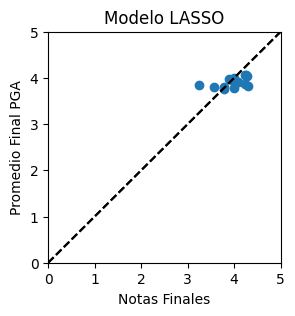

In [205]:
from sklearn.linear_model import Lasso

model = Lasso(alpha= 0.05)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('r2 error: ', metrics.r2_score(y_test, y_pred) )
print('MSE error: ', metrics.mean_squared_error(y_test, y_pred) )
print('MAE error: ', metrics.mean_absolute_error(y_test, y_pred) )

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5], c='k', linestyle='--')
plt.xlim(0, 5)  # Establecer límites del eje x
plt.ylim(0, 5)  # Establecer límites del eje y
pl.plot(np.linspace(0,25),np.linspace(0,25), c='k', linestyle='--')
pl.xlabel("Notas Finales")
pl.ylabel("Promedio Final PGA")
pl.title('Modelo LASSO')
pl.show()

# Modelo Ridge

r2 error:  0.2947322021546628
MSE error:  0.06009637281711396
MAE error:  0.18523318201359498


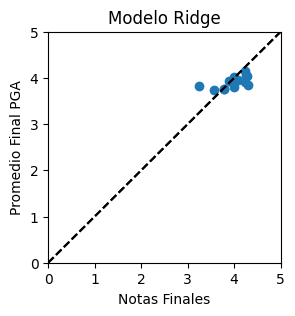

In [201]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=18)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('r2 error: ', metrics.r2_score(y_test, y_pred) )
print('MSE error: ', metrics.mean_squared_error(y_test, y_pred) )
print('MAE error: ', metrics.mean_absolute_error(y_test, y_pred) )

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5], c='k', linestyle='--')
plt.xlim(0, 5)  # Establecer límites del eje x
plt.ylim(0, 5)  # Establecer límites del eje y
pl.plot(np.linspace(0,25),np.linspace(0,25), c='k', linestyle='--')
pl.xlabel("Notas Finales")
pl.ylabel("Promedio Final PGA")
pl.title('Modelo Ridge')
pl.show()

|            | r2 error | MSE error | MAE error |
|------------|----------|-----------|-----------|
| Modelo Lasso | 0.1844   | 0.0695    | 0.2040    |
| Modelo Ridge | 0.2947   | 0.0601    | 0.1852    |


El modelo Ridge muestra un mejor rendimiento en la predicción de Promedio Final PGA.


1.   Modelo Ridge explica una mayor $R^2$ proporción de la variabilidad en la variable Promedio Final PGA en comparación con el modelo Lasso, aunque el modelo sigue siendo bajo ya que entre mas cerca al 1 mejor el modelo predicctivo
2.   El valor de MSE más bajo indica un mejor ajuste del modelo a los datos.El modelo Ridge tiene un MSE de 0.0601, que es menor que el MSE de 0.0695 del modelo Lasso. Entoces, el modelo Ridge tiene un mejor ajuste a los datos en términos de MSE.
3.   El valor de MAE más bajo indica un mejor ajuste del modelo a los datos en términos de la magnitud de los errores. En este caso, el modelo Ridge tiene un MAE ligeramente más bajo 0.1852 en comparación con el MAE del modelo Lasso 0.2040, lo que sugiere que el modelo Ridge tiene un mejor ajuste en términos de la magnitud de los errores.



#Punto 2: Clasificación
Usando los mismos datos del problema anterior entrene un modelo de clasificación que le
permita diferenciar entre estudiantes destacados (Promedio General >= 4 ) y estudiantes
regulares a partir de las notas finales de los cursos de Física 1, Física 2, Cálculo Diferencial
y Álgebra Lineal. Utilice al menos dos modelos de clasificación diferentes y reporte las
métricas obtenidas con la mejor configuración de meta-parametros posible.


In [278]:
np.unique(data['Promedio_Final'],return_counts=True)

(array([3.25, 3.3 , 3.46, 3.5 , 3.52, 3.56, 3.57, 3.65, 3.66, 3.68, 3.7 ,
        3.71, 3.72, 3.73, 3.78, 3.79, 3.8 , 3.82, 3.83, 3.85, 3.86, 3.89,
        3.9 , 3.91, 3.95, 3.96, 3.99, 4.  , 4.01, 4.02, 4.04, 4.05, 4.08,
        4.09, 4.1 , 4.15, 4.16, 4.18, 4.23, 4.24, 4.25, 4.26, 4.28, 4.3 ,
        4.31, 4.37, 4.4 , 4.41, 4.69, 4.71, 4.81]),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
        1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 4,
        1, 1, 1, 1, 1, 1, 1]))

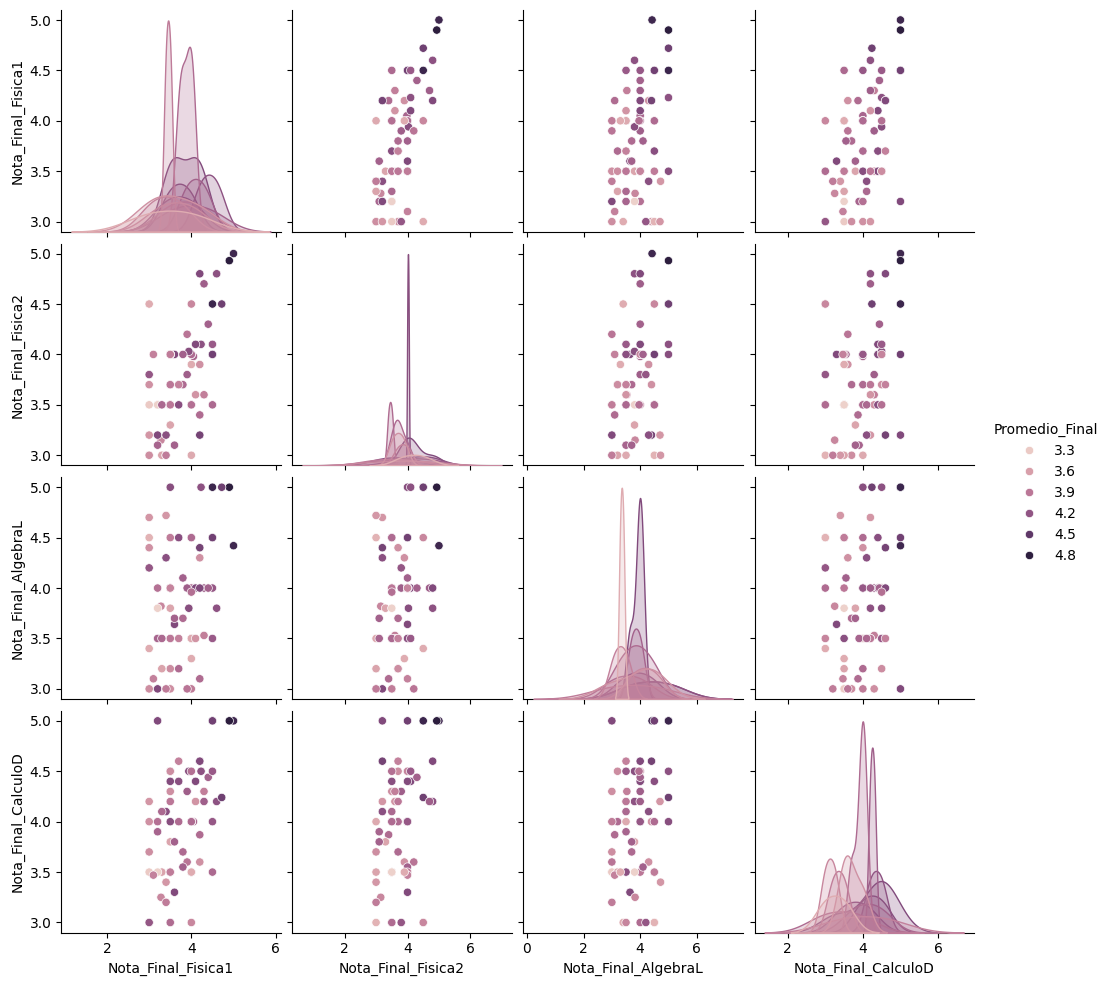

In [279]:
sns.pairplot(data, hue='Promedio_Final')

In [285]:
# Definir las características (X) y las etiquetas (y), # Etiquetas binarias: 1 para estudiantes destacados, 0 para estudiantes regulares
X1 = data[['Nota_Final_Fisica1', 'Nota_Final_Fisica2', 'Nota_Final_AlgebraL', 'Nota_Final_CalculoD']]
y1 = (data['Promedio_Final'] >= 4).astype(int)
results = pd.DataFrame({
    'Nota_Final_Fisica1': X['Nota_Final_Fisica1'],
    'Nota_Final_Fisica2': X['Nota_Final_Fisica2'],
    'Nota_Final_AlgebraL': X['Nota_Final_AlgebraL'],
    'Nota_Final_CalculoD': X['Nota_Final_CalculoD'],
    'Promedio_Final': data['Promedio_Final'],
    'Etiqueta': y
})
print(results)

    Nota_Final_Fisica1  Nota_Final_Fisica2  Nota_Final_AlgebraL  \
0                 4.60                4.80                 3.80   
1                 3.00                3.70                 4.40   
2                 4.05                3.98                 4.00   
3                 5.00                5.00                 4.42   
4                 3.60                4.00                 3.64   
..                 ...                 ...                  ...   
64                4.50                4.10                 3.50   
65                3.00                3.80                 4.20   
66                4.00                3.50                 3.96   
67                3.70                3.70                 3.50   
68                4.00                3.90                 3.30   

    Nota_Final_CalculoD  Promedio_Final  Etiqueta  
0                   4.2            4.23         1  
1                   4.0            3.70         0  
2                   4.0            4.04

In [286]:
# se separa el test y el train
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [287]:
X1_train.shape, X1_test.shape

((55, 4), (14, 4))

# Clasificación con K-NN

F1:  0.8541666666666667
MC: 
 [[7 0]
 [2 5]]


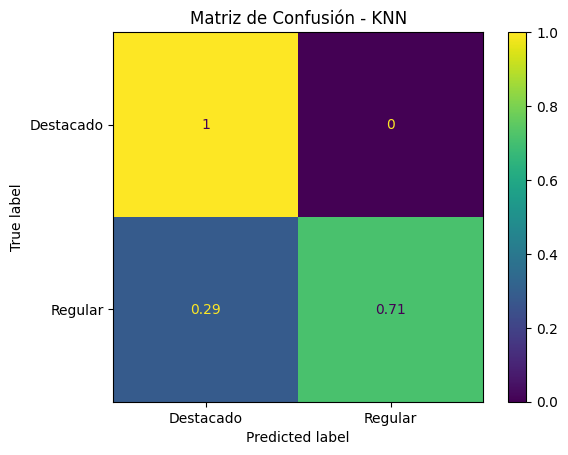

In [288]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X1_train, y1_train)

y_pred = model.predict(X1_test)

print('F1: ', metrics.f1_score(y1_test, y_pred, average='weighted') )
print('MC: \n', metrics.confusion_matrix(y1_test, y_pred) )

cm = metrics.confusion_matrix(y1_test, y_pred, labels=model.classes_, normalize='true')
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['Destacado','Regular'])
disp.plot()
pl.title('Matriz de Confusión - KNN')
pl.show()



1.   El modelo de KNeighborsClassifier logra un buen rendimiento con un F1 score de 0.854, lo que indica una buena combinación de precisión y exhaustividad en la clasificación




# Clasificación con SVM

F1:  0.7754010695187166
MC: 
 [[7 0]
 [3 4]]


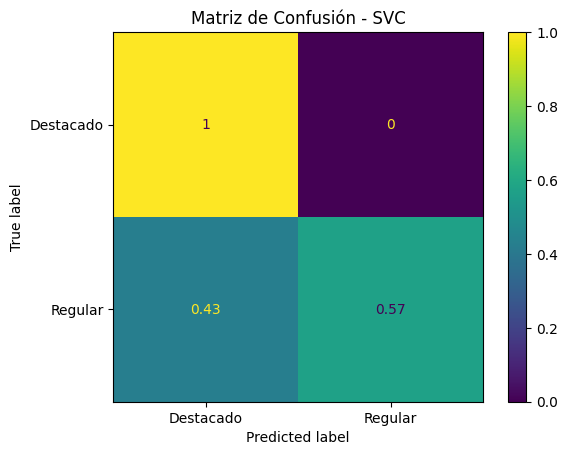

In [289]:

from sklearn.svm import SVC

model = SVC(C=1)
model.fit(X1_train, y1_train)

y_pred = model.predict(X1_test)

print('F1: ', metrics.f1_score(y1_test, y_pred, average='weighted') )
print('MC: \n', metrics.confusion_matrix(y1_test, y_pred) )

cm = metrics.confusion_matrix(y1_test, y_pred, labels=model.classes_, normalize='true')
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['Destacado','Regular'])
disp.plot()
pl.title('Matriz de Confusión - SVC')
pl.show()



1.   El modelo SVC obtiene un F1 score de 0.775, lo que indica un rendimiento decente, pero ligeramente inferior al obtenido por el modelo KNeighborsClassifier



| Modelo                 | F1 Score | Matriz de Confusión |
|------------------------|----------|---------------------|
| SVM                    | 0.775    | [7 0] [3 4]       |
| KNeighborsClassifier  | 0.854    | [7 0] [2 5]      |

Los modelos muestran un rendimiento presentable, pero el modelo KNeighborsClassifier parece tener un mejor rendimiento, con un F1 score más alto y una menor cantidad de clasificaciones incorrectas en la matriz de confusión

#Punto 3: Análisis
Existe alguna relación que pueda establecer entre las notas finales de las materias de
Física 1, Física 2, Álgebra Lineal, Cálculo Diferencial y el promedio Final de la carrera?
Identifique la correlación entre las notas finales de cada materia con el promedio general
final. ¿Cuál es la materia que tiene mayor correlación con el promedio general?

In [315]:
# Calculo Matriz de Correlaciones
data.corr(numeric_only=True)

,Nota_Final_Fisica1,Nota_Final_Fisica2,Nota_Final_AlgebraL,Nota_Final_CalculoD,Promedio_Final
Nota_Final_Fisica1,1.000000,0.600901,0.329736,0.501877,0.580333
Nota_Final_Fisica2,0.600901,1.000000,0.319258,0.330565,0.524539
Nota_Final_AlgebraL,0.329736,0.319258,1.000000,0.224380,0.445460
Nota_Final_CalculoD,0.501877,0.330565,0.224380,1.000000,0.590090
Promedio_Final,0.580333,0.524539,0.445460,0.590090,1.000000


In [320]:
# Seleccionar las columnas relevantes
notas_finales = data[['Nota_Final_Fisica1', 'Nota_Final_Fisica2', 'Nota_Final_AlgebraL', 'Nota_Final_CalculoD', 'Promedio_Final']]
# Calcular la matriz de correlación
correlation_matrix = notas_finales.corr()
# Extraer la correlación de cada nota final de la materia con el promedio final
correlation_with_average = correlation_matrix['Promedio_Final'].drop('Promedio_Final')
print("Correlación entre cada nota final de la materia y el promedio final:\n")
print(correlation_with_average)


Correlación entre cada nota final de la materia y el promedio final:

Nota_Final_Fisica1     0.580333
Nota_Final_Fisica2     0.524539
Nota_Final_AlgebraL    0.445460
Nota_Final_CalculoD    0.590090
Name: Promedio_Final, dtype: float64


Se puede concluir que todas las materias tienen alguna relación con el promedio final de la carrera, pero la relación en la correlación cambia en las materias y que Cálculo parece tener la relación más fuerte, seguida de Física 1 y Física 2, mientras que Álgebra tiene la relación más débil. Esto nos dice que un buen desempeño en Cálculo puede tener un impacto más significativo en el promedio final de la carrera en comparación con las otras materias, o sea si va bien en Cálculo es probable que le vaya bien en otras materias y el promedio final. Aunque la correlación es buena, no es puede concluir que se perfecta ya que no llega a 1 ni cerca al 1

# **Las notas finales en Cálculo tienen una correlación más fuerte con el promedio final.**

Las correlaciones indican que las notas finales en Cálculo, Física 1 y Física 2 están más relacionadas con el promedio final, mientras que las notas finales en Álgebra tienen una relación menos fuerte.

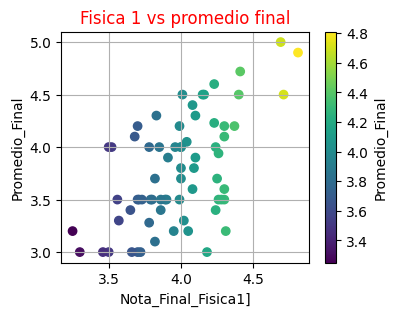

In [300]:
# Grafico un scatter plot
fig = pl.figure(figsize=(4,3))
pl.scatter(data.Promedio_Final, data.Nota_Final_Fisica1, c=data['Promedio_Final'], marker='o')
pl.colorbar(label='Promedio_Final')
pl.xlabel('Nota_Final_Fisica1]')
pl.ylabel('Promedio_Final')
pl.title('Fisica 1 vs promedio final', c='red')
pl.grid()

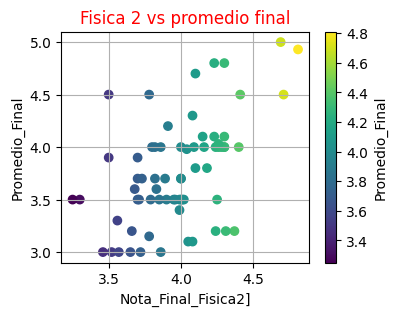

In [301]:
# Grafico un scatter plot
fig = pl.figure(figsize=(4,3))
pl.scatter(data.Promedio_Final, data.Nota_Final_Fisica2, c=data['Promedio_Final'], marker='o')
pl.colorbar(label='Promedio_Final')
pl.xlabel('Nota_Final_Fisica2')
pl.ylabel('Promedio_Final')
pl.title('Fisica 2 vs promedio final', c='red')
pl.grid()

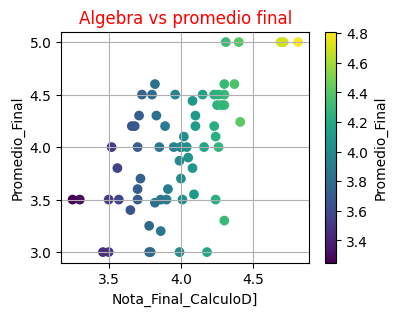

In [303]:
# Grafico un scatter plot
fig = pl.figure(figsize=(4,3))
pl.scatter(data.Promedio_Final, data.Nota_Final_CalculoD, c=data['Promedio_Final'], marker='o')
pl.colorbar(label='Promedio_Final')
pl.xlabel('Nota_Final_CalculoD]')
pl.ylabel('Promedio_Final')
pl.title('Algebra vs promedio final', c='red')
pl.grid()

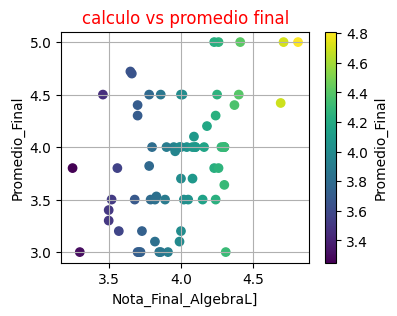

In [306]:
# Grafico un scatter plot
fig = pl.figure(figsize=(4,3))
pl.scatter(data.Promedio_Final, data.Nota_Final_AlgebraL, c=data['Promedio_Final'], marker='o')
pl.colorbar(label='Promedio_Final')
pl.xlabel('Nota_Final_AlgebraL]')
pl.ylabel('Promedio_Final')
pl.title('calculo vs promedio final', c='red')
pl.grid()